# Basic tests for the HHH neuron

In [1]:
# from bokeh.plotting import figure
# from bokeh.io import show, output_notebook
# from bokeh.layouts import column, row
# from bokeh.models import Range1d
# output_notebook()

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})

%matplotlib inline

import seaborn as sns
sns.set(font_scale=3)
sns.set_style('ticks')

import numpy as np

from resistingrhythm.util import poisson_impulse
from resistingrhythm.util import poisson_oscillation
from resistingrhythm.util import current_pulse
from resistingrhythm.util import load_spikes

from resistingrhythm.neurons import HHH

# Shared params

In [2]:
time = 20
N = 1

V_e = 0
V_i = -80e-3

tau_e = 5e-3
tau_i = 10e-3

tau_h = 4

w = (5e-6, 50e-6)

# Generate some spiking input....

In [3]:
# Or load some input
osc_name = "/Users/qualia/Code/resistingrhythm/data/osc160.csv"
stim_name = "/Users/qualia/Code/resistingrhythm/data/stim3.csv"

# ns_osc, ts_osc = np.asarray([]), np.asarray([])
ns_osc, ts_osc = load_spikes(osc_name)
ns_in, ts_in = load_spikes(stim_name)

# Tonic bias?

In [4]:
# external_current = current_pulse(time, t_onset=2, t_offset=2.5, I=0.5e-6)

# Run HHH

In [17]:
results = HHH(
    time,
    ns_in,
    ts_in,
    ns_osc,
    ts_osc,
    external_current=None,
    N=N,
    Ca_target=0.003,
    tau_h=tau_h,
    w_in=w,
    tau_in=tau_e,
    V_in=V_e,
    bias_in=0.0e-9,
    w_osc=w,
    tau_osc=tau_i,
    V_osc=V_i,
    sigma=0,
    homeostasis=True,
    time_step=1e-5,
    seed_value=42
)

In [18]:
results.keys()
results['v_m'].std()

0.0021245165820306666

In [19]:
n = 0

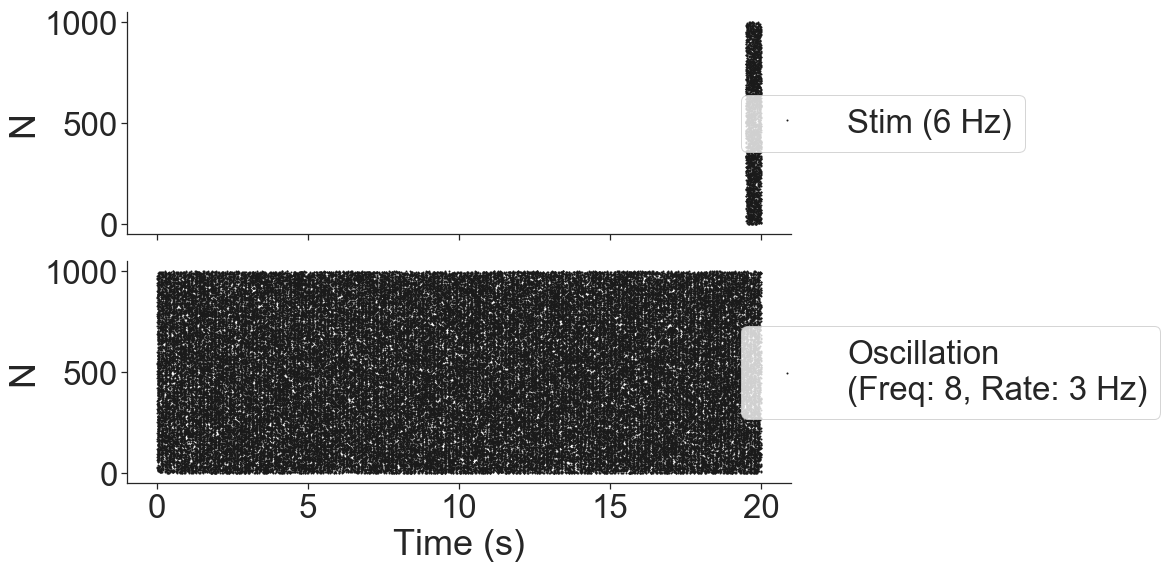

In [23]:
# plt.figure()
fig, ax = plt.subplots(2, sharex=True, figsize=(16, 8))

_ = ax[0].plot(ts_in, ns_in, 
               markersize=1, marker='o', linestyle='', color='k', label='Stim (6 Hz)')
_ = ax[0].set_ylabel("N")
_ = ax[0].legend(loc='center left', bbox_to_anchor=(.9, 0.5))

_ = ax[1].plot(ts_osc, ns_osc, 
               markersize=1, marker='o', linestyle='', color='k', label='Oscillation\n(Freq: 8, Rate: 3 Hz)')
_ = ax[1].set_xlabel("Time (s)")
_ = ax[1].set_ylabel("N")
_ = ax[1].legend(loc='center left', bbox_to_anchor=(.9, 0.5))

plt.tight_layout()
sns.despine()

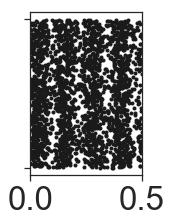

In [24]:
# plt.figure()
fig, ax = plt.subplots(1, sharex=True, figsize=(2, 3))

_ = ax.plot(ts_osc, ns_osc, 
               markersize=3, marker='o', linestyle='', color='k')
_ = ax.set_yticklabels([])
_ = ax.set_xlim(0, 0.5)
# sns.despine()

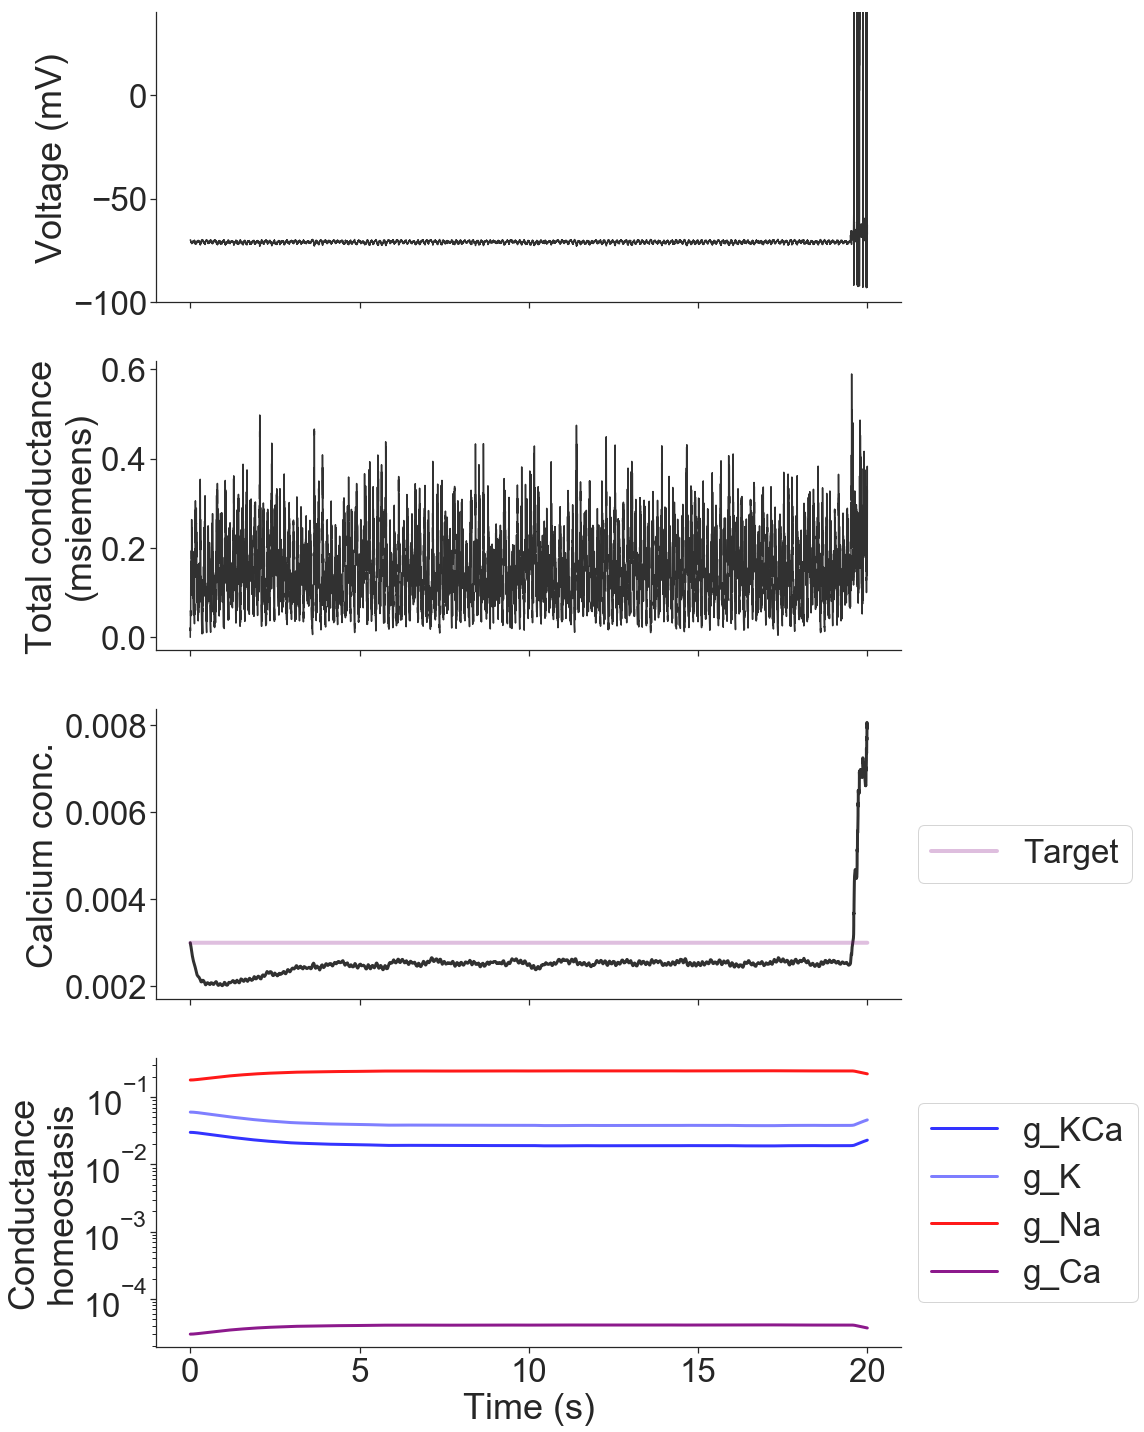

In [25]:
# plt.figure()
fig, ax = plt.subplots(4, sharex=True, figsize=(16, 20))

# Vm
t = results['times']
v = results['v_m'][n, :]*1e3
_ = ax[0].plot(t, v, linestyle='-', linewidth=1.5, color='k', alpha=0.9)
_ = ax[0].set_ylabel("Voltage (mV)")
_ = ax[0].set_ylim(-100, 40)

# Gtotal
t = results['times']
v = results['g_total'][n, :]*1e3
_ = ax[1].plot(t, v, linestyle='-', linewidth=1.5, color='k', alpha=0.9)
_ = ax[1].set_ylabel("Total conductance\n(msiemens)")
# _ = ax[1].set_ylim(-100, 40)

# Ca
ca_target = 0.003
t = results['times']
v = results['calcium'][n, :]
_ = ax[2].plot(t, v, linestyle='-', linewidth=3, color='k', alpha=0.9)
_ = ax[2].plot(t, np.repeat(ca_target, v.size), 
               linestyle='-', linewidth=4, color='purple', alpha=0.25, label="Target")
_ = ax[2].set_ylabel("Calcium conc.")
_ = ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# _ = ax[1].set_ylim(-100, 40)

# Homeostatsis
t = results['times']
v1 = results['g_KCa'][n, :]
v2 = results['g_K'][n, :]
v3 = results['g_Na'][n, :]
v4 = results['g_Ca'][n, :]
_ = ax[3].semilogy(t, v1, linestyle='-', linewidth=3, color='blue', alpha=0.8, label="g_KCa")
_ = ax[3].semilogy(t, v2, linestyle='-', linewidth=3, color='blue', alpha=0.5, label="g_K")
_ = ax[3].semilogy(t, v3, linestyle='-', linewidth=3, color='red', alpha=0.9, label="g_Na")
_ = ax[3].semilogy(t, v4, linestyle='-', linewidth=3, color='purple', alpha=0.9, label="g_Ca")
_ = ax[3].set_xlabel("Time (s)")
_ = ax[3].set_ylabel("Conductance\nhomeostasis")
_ = ax[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# -
plt.tight_layout()
sns.despine()